# Data Cleaning for Food and Beverage Dataset

In [1]:
# import packages
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# read in the dataset
FB = pd.read_csv('foodandbev.csv')

In [2]:
# drop rows of NAs from the dataset 
FB = FB.dropna()
FB

,company,market_cap,country,region,subindustry,score_2020,commitment_and_governance_score,traceability_and_risk_assessment_score,purchasing_practices_score,recruitment_score,worker_voice_score,monitoring_score,remedy_score
0,Tesco plc,29.0,United Kingdom,Europe,Food Retail,65.0,90.0,69.0,42.0,66.0,67.0,70.0,50.0
1,Unilever plc,221.0,United Kingdom,Europe,Packaged Foods,60.0,91.0,69.0,48.0,60.0,50.0,55.0,50.0
2,Nestlé SA,270.0,Switzerland,Europe,Packaged Foods,55.0,77.0,88.0,23.0,68.0,37.0,65.0,31.0
3,Kellogg Co.,19.0,United States,North America,Packaged Foods,54.0,86.0,75.0,39.0,45.0,22.0,50.0,63.0
4,Walmart Inc.,316.0,United States,North America,Food Retail,54.0,80.0,44.0,38.0,53.0,57.0,60.0,44.0
5,Woolworths Group Ltd.,27.0,Australia,Australia,Food Retail,52.0,92.0,44.0,55.0,44.0,43.0,45.0,44.0
6,The Coca-Cola Company,194.0,United States,North America,Soft Drinks,52.0,82.0,56.0,40.0,46.0,18.0,60.0,63.0
7,Coles Group Ltd.,12.0,Australia,Australia,Food Retail,46.0,72.0,38.0,30.0,56.0,40.0,45.0,44.0
8,The J. M. Smucker Company,12.0,United States,North America,Packaged Foods,46.0,80.0,63.0,18.0,36.0,21.0,55.0,50.0
9,Wilmar International Ltd.,15.0,Singapore,Asia,Agricultural Products,45.0,78.0,56.0,33.0,31.0,33.0,30.0,56.0


In [3]:
# one hot encoding of region and subindustry
FB_region = pd.get_dummies(FB.region).astype('category')
FB_subindustry = pd.get_dummies(FB.subindustry).astype('category')
FB = pd.merge(FB, FB_region, left_index = True, right_index = True) 
FB = pd.merge(FB, FB_subindustry, left_index = True, right_index = True) 
FB

,company,market_cap,country,region,subindustry,score_2020,commitment_and_governance_score,traceability_and_risk_assessment_score,purchasing_practices_score,recruitment_score,...,Asia,Australia,Europe,Latin America,Middle East,North America,Agricultural Products,Food Retail,Packaged Foods,Soft Drinks
0,Tesco plc,29.0,United Kingdom,Europe,Food Retail,65.0,90.0,69.0,42.0,66.0,...,0,0,1,0,0,0,0,1,0,0
1,Unilever plc,221.0,United Kingdom,Europe,Packaged Foods,60.0,91.0,69.0,48.0,60.0,...,0,0,1,0,0,0,0,0,1,0
2,Nestlé SA,270.0,Switzerland,Europe,Packaged Foods,55.0,77.0,88.0,23.0,68.0,...,0,0,1,0,0,0,0,0,1,0
3,Kellogg Co.,19.0,United States,North America,Packaged Foods,54.0,86.0,75.0,39.0,45.0,...,0,0,0,0,0,1,0,0,1,0
4,Walmart Inc.,316.0,United States,North America,Food Retail,54.0,80.0,44.0,38.0,53.0,...,0,0,0,0,0,1,0,1,0,0
5,Woolworths Group Ltd.,27.0,Australia,Australia,Food Retail,52.0,92.0,44.0,55.0,44.0,...,0,1,0,0,0,0,0,1,0,0
6,The Coca-Cola Company,194.0,United States,North America,Soft Drinks,52.0,82.0,56.0,40.0,46.0,...,0,0,0,0,0,1,0,0,0,1
7,Coles Group Ltd.,12.0,Australia,Australia,Food Retail,46.0,72.0,38.0,30.0,56.0,...,0,1,0,0,0,0,0,1,0,0
8,The J. M. Smucker Company,12.0,United States,North America,Packaged Foods,46.0,80.0,63.0,18.0,36.0,...,0,0,0,0,0,1,0,0,1,0
9,Wilmar International Ltd.,15.0,Singapore,Asia,Agricultural Products,45.0,78.0,56.0,33.0,31.0,...,1,0,0,0,0,0,1,0,0,0


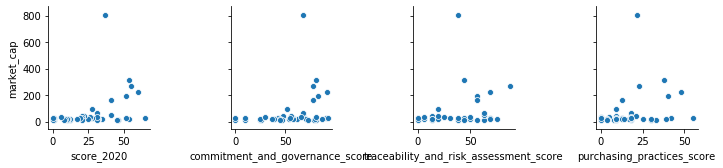

In [4]:
# Plots for Exploratory Data Analysis

# Seaborn visualization library
import seaborn as sns
# Create the plots
g = sns.pairplot(FB, y_vars = ["market_cap"], x_vars=["score_2020", "commitment_and_governance_score", 
                                                      "traceability_and_risk_assessment_score", 
                                                      "purchasing_practices_score"])
                                                                  

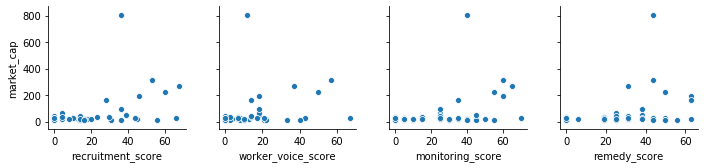

In [5]:
g = sns.pairplot(FB, y_vars = ["market_cap"], x_vars=["recruitment_score",
                                                      "worker_voice_score", 
                                                      "monitoring_score", "remedy_score"]) 


# Random Forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree

## General Score

In [7]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['score_2020']]

In [8]:
regr = RandomForestRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 5, random_state=0)
regr.fit(X, y.values.reshape(-1))
FB_general = regr.score(X,y)
#54% of the variance can be explained by the model

#### Residuals vs Actual Graph 

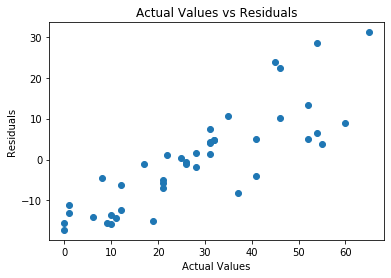

In [9]:
# residuals vs actual graph
resid = y.values.reshape(-1) - regr.predict(X)

import matplotlib.pyplot as plt
plt.scatter(y.values.reshape(-1), resid)
plt.title("Actual Values vs Residuals")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()

# corr between residuals and the actual values, the residuals are much larger as the y value increases.
# underestimates high actual scores and overestimates low actual scores

Text(0.5, 1.0, 'Distribution of the Composite Score for the Food & Beverage Dataset')

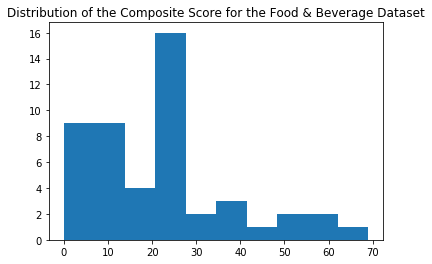

In [66]:
plt.hist(y.values.reshape(-1))
plt.title("Distribution of the Composite Score for the Food & Beverage Dataset")

#### One Decision Tree from the Random Forest

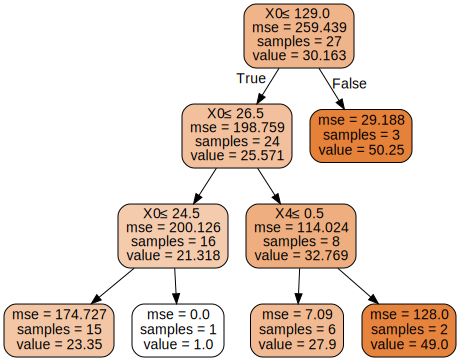

In [10]:
import graphviz

dot_data = tree.export_graphviz(regr.estimators_[10], out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# overfit to high y values

## Score 1: Commitment and Governance Score

In [11]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['commitment_and_governance_score']]

In [12]:
regr1 = regr.fit(X, y.values.reshape(-1))
FB_1 = regr1.score(X,y)

## Score 2: Traceability and Risk Assessment Score

In [13]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['traceability_and_risk_assessment_score']]

In [14]:
regr2 = regr.fit(X, y.values.reshape(-1))
FB_2 = regr2.score(X,y)

## Score 3: Purchasing Practices Score

In [15]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['purchasing_practices_score']]

In [16]:
regr3 = regr.fit(X, y.values.reshape(-1))
FB_3 = regr3.score(X,y)

## Score 4: Recruitment Score

In [17]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['recruitment_score']]

In [18]:
regr4 = regr.fit(X, y.values.reshape(-1))
FB_4 = regr4.score(X,y)

## Score 5: Worker Voice Score

In [19]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['worker_voice_score']]

In [20]:
regr5 = regr.fit(X, y.values.reshape(-1))
FB_5 = regr5.score(X,y)

## Score 6: Monitoring Score

In [21]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['monitoring_score']]

In [22]:
regr6 = regr.fit(X, y.values.reshape(-1))
FB_6 = regr6.score(X,y)

## Score 7: Remedy Score

In [23]:
X = FB[['market_cap', 'North America', 'Asia', 'Australia', 'Europe', 'Latin America', 'Middle East', 
       'Agricultural Products', 'Food Retail', 'Packaged Foods', 'Soft Drinks']]
y = FB[['remedy_score']]

In [24]:
regr7 = regr.fit(X, y.values.reshape(-1))
FB_7 = regr7.score(X,y)

# Data Cleaning for ICT Dataset

In [25]:
# read in data
ICT = pd.read_csv('ict.csv')

In [26]:
# one hot encoding for region
ICT_region = pd.get_dummies(ICT.region).astype('category')
ICT = pd.merge(ICT, ICT_region, left_index = True, right_index = True) 
ICT

,company,market_cap,country,region,commitment_and_governance_score,traceability_and_risk_assessment_score,purchasing_practices_score,recruitment_score,worker_voice_score,monitoring_score,remedy_score,score_2020,Asia,Europe,North America
0,Amazon.com Inc.,805,United States,North America,62,88,22,36,12,40,44,43,0,0,1
1,Amphenol Corp.,28,United States,North America,40,25,4,26,8,0,6,16,0,0,1
2,Analog Devices Inc.,34,United States,North America,48,25,26,26,11,10,19,24,0,0,1
3,Apple Inc.,852,United States,North America,83,81,30,74,63,85,56,68,0,0,1
4,Applied Materials Inc.,56,United States,North America,59,38,9,39,4,15,19,26,0,0,1
5,ASML Holding NV,87,Netherlands,Europe,52,6,9,26,14,5,13,18,0,1,0
6,Best Buy Co. Inc.,21,United States,North America,75,94,35,33,15,65,50,52,0,0,1
7,BOE Technology Group Co. Ltd.,33,China,Asia,2,0,25,0,0,5,0,5,1,0,0
8,Broadcom Inc.,102,United States,North America,33,19,4,0,7,5,0,10,0,0,1
9,Canon Inc.,43,Japan,Asia,42,25,21,0,7,5,0,14,1,0,0


## General Score

In [27]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['score_2020']]

In [28]:
regr = regr.fit(X, y.values.reshape(-1))
ICT_General = regr.score(X,y)

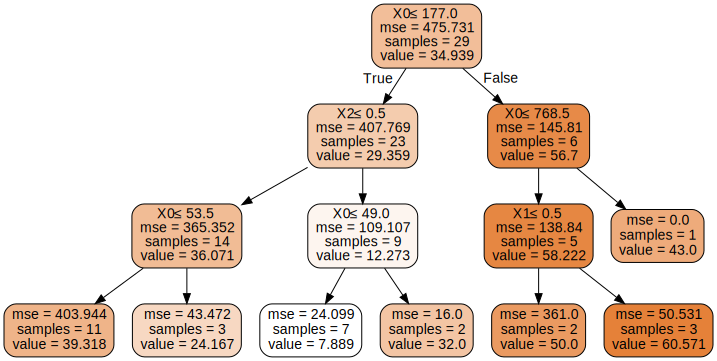

In [29]:
dot_data = tree.export_graphviz(regr.estimators_[10], out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Committment and Governance Score

In [30]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['commitment_and_governance_score']]

In [31]:
regr1 = regr.fit(X, y.values.reshape(-1))
ICT_1 = regr1.score(X,y)

## Traceability and Risk Assessment Score

In [32]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['traceability_and_risk_assessment_score']]

In [33]:
regr2 = regr.fit(X, y.values.reshape(-1))
ICT_2 = regr2.score(X,y)

## Purchasing Practices Score

In [61]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['purchasing_practices_score']]

In [62]:
regr3 = regr.fit(X, y.values.reshape(-1))
ICT_3 = regr3.score(X,y)
ICT_3

0.3709554820333131

## Recruitment Score

In [36]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['recruitment_score']]

In [37]:
regr4 = regr.fit(X, y.values.reshape(-1))
ICT_4 = regr4.score(X,y)

## Worker Voice Score

In [38]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['worker_voice_score']]

In [39]:
regr5 = regr.fit(X, y.values.reshape(-1))
ICT_5 = regr5.score(X,y)

## Monitoring Score

In [40]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['monitoring_score']]

In [41]:
regr6 = regr.fit(X, y.values.reshape(-1))
ICT_6 = regr6.score(X,y)

## Remedy Score

In [55]:
X = ICT[['market_cap', 'North America', 'Asia', 'Europe']]
y = ICT[['remedy_score']]

In [56]:
regr7 = regr.fit(X, y.values.reshape(-1))
ICT_7 = regr7.score(X,y)

0.489056070588632

# Table

In [44]:
FB_general = round(FB_general, 4)
FB_1 = round(FB_1, 4)
FB_2 = round(FB_2, 4)
FB_3 = round(FB_3, 4)
FB_4 = round(FB_4, 4)
FB_5 = round(FB_5, 4)
FB_6 = round(FB_6, 4)
FB_7 = round(FB_7, 4)

In [57]:
ICT_General = round(ICT_General, 4)
ICT_1 = round(ICT_1, 4)
ICT_2 = round(ICT_2, 4)
ICT_3 = round(ICT_3, 4)
ICT_4 = round(ICT_4, 4)
ICT_5 = round(ICT_5, 4)
ICT_6 = round(ICT_6, 4)
ICT_7 = round(ICT_7, 4)

0.371

In [58]:
import plotly.graph_objects as go

values = ['General', 'Commitment and Governance', 
           'Traceability and Risk Assessment', 'Purchasing Practices',
          'Recruitment', 'Worker Voice', 'Monitoring', 'Remedy']

fig = go.Figure(data=[go.Table(header=dict(values=['Score',
                                                   'Food & Beverage Score', 
                                                   'Info & Communication Technology Score']),
                 cells=dict(values= [values, #column 1
                                    [FB_general, FB_1, FB_2, FB_3, FB_4, FB_5, FB_6, FB_7], #column 2
                                    [ICT_General, ICT_1, ICT_2, ICT_3, ICT_4, ICT_5, ICT_6, ICT_7]])) # column 3
                     ])
fig.show()